# Random Allelic Expression in the Human Body
### Stephanie N. Kravitz, Aaron R. Quinlan, Christopher Gregg

## Contents
1. [Figure 1F: Allele ratio barplots for GTEX-YFC4](#Figure-1F:-Allele-ratio-barplots-for-GTEX-YFC4)
2. [Figure 1G-H: Binomial and Beta-Binomial fits to allelic expression for ARL17A and FMR1](#Figure-1G-H:-Binomial-and-Beta-Binomial-fits-to-allelic-expression-for-ARL17A-and-FMR1)
3. [Figure 1I: -log10(p-value) for autosomal and X-inactive genes for GTEX-YFC4](#Figure-1I:--log10(p-value)-for-autosomal-and-X-inactive-genes-for-GTEX-YFC4)
4. [Figure 1J: The proportion of significant (q<0.1) and non-significant autosomal and X-inactive genes for GTEX-YFC4](#Figure-1J:-The-proportion-of-significant-(q<0.1)-and-non-significant-autosomal-and-X-inactive-genes-for-GTEX-YFC4)

### Prior to recreating figures, first import necessary libraries and set global plot aesthetics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

plt.rcParams['pdf.fonttype'] = 42

%matplotlib inline
%matplotlib nbagg


## Figure 1F: Allele ratio barplots for GTEX-YFC4 

### Read in data files corresponding to "Allele 1 Counts" and "Total Counts" for GTEX-YFC4. For simplicity we have only included the data for the four genes shown in the manuscript figure

In [3]:
# "Allele 1" counts for each gene:
df_a1 = pd.read_csv('../data/GTEX-YFC4/GTEX-YFC4_to-plot_counts.y.txt', sep='\t')

# "Total" counts for each gene:
df_tot = pd.read_csv('../data/GTEX-YFC4/GTEX-YFC4_to-plot_counts.tot.txt', sep='\t')

In [4]:
df_a1.head()

,GENE_ID,GENE_NAME,OVARY,SKINS,LUNG,BRNCDT,ARTCRN,VAGINA,MSCLSK,BRNSPC,...,BRNHPT,ESPMCS,BRNAMY,BRNACC,HRTLV,UTERUS,BREAST,BRNHPP,ARTAORT,BRNCTXA
0,ENSG00000100030.14,MAPK1,252,466,427,1427,422,290,99.0,605,...,877,383,1791,1856,138,670,423,1886,589,655
1,ENSG00000185829.17,ARL17A,46,38,24,29,25,56,16.0,23,...,14,14,21,22,16,91,70,25,26,21
2,ENSG00000178184.15,PARD6G,97,339,33,32,70,133,NaN,40,...,35,158,31,41,21,128,196,79,34,37
3,ENSG00000102081.13,FMR1,64,34,61,49,50,45,14.0,47,...,37,30,37,63,15,104,91,35,89,36


In [5]:
df_tot.head()

,GENE_ID,GENE_NAME,OVARY,SKINS,LUNG,BRNCDT,ARTCRN,VAGINA,MSCLSK,BRNSPC,...,BRNHPT,ESPMCS,BRNAMY,BRNACC,HRTLV,UTERUS,BREAST,BRNHPP,ARTAORT,BRNCTXA
0,ENSG00000100030.14,MAPK1,486,959,857,2919,897,630,211.0,1272,...,1781,754,3626,3891,294,1335,821,3833,1291,1343
1,ENSG00000185829.17,ARL17A,191,134,137,100,99,181,48.0,90,...,65,65,87,93,51,305,305,92,107,80
2,ENSG00000178184.15,PARD6G,160,594,59,54,116,269,NaN,68,...,55,269,61,60,34,252,273,130,59,52
3,ENSG00000102081.13,FMR1,125,43,94,93,79,83,20.0,79,...,63,68,76,135,28,212,132,69,119,81


### For the purposes of the figure, I take a subset of tissues with data for every gene

In [6]:
print(df_tot.columns)

Index(['GENE_ID', 'GENE_NAME', 'OVARY', 'SKINS', 'LUNG', 'BRNCDT', 'ARTCRN',
       'VAGINA', 'MSCLSK', 'BRNSPC', 'BRNCHA', 'BRNNCC', 'HRTAA', 'THYROID',
       'LIVER', 'BRNPTM', 'FIBRBLS', 'NERVET', 'PTTARY', 'BRNCHB', 'ADPSBQ',
       'WHLBLD', 'BRNCTXB', 'ESPGEJ', 'BRNSNG', 'ARTTBL', 'BRNHPT', 'ESPMCS',
       'BRNAMY', 'BRNACC', 'HRTLV', 'UTERUS', 'BREAST', 'BRNHPP', 'ARTAORT',
       'BRNCTXA'],
      dtype='object')


In [7]:
col_list = ['SKINS', 'LUNG', 'BRNCDT', 'ARTCRN',
       'VAGINA', 'BRNSPC', 'BRNCHA', 'BRNNCC', 'HRTAA', 'THYROID',
       'LIVER', 'BRNPTM', 'NERVET', 'PTTARY', 'ADPSBQ',
       'ESPGEJ', 'BRNSNG', 'BRNHPT', 'ESPMCS',
       'BRNAMY', 'BRNACC', 'HRTLV', 'UTERUS', 'BREAST', 'BRNHPP', 'ARTAORT', 'BRNCTXA']

col_list.sort()

# I subset 27 tissues to plot:
print(len(col_list))

27


In [8]:
## Set df index to GENE_ID and GENE_NAME:
df_a1.set_index(['GENE_ID', 'GENE_NAME'], inplace=True)
df_tot.set_index(['GENE_ID', 'GENE_NAME'], inplace=True)

## Get allele ratios for GTEX-15ER7 and GTEX-YFC4:
allele_ratios = df_a1 / df_tot

## Subset columns to plot: 
allele_ratios = allele_ratios[col_list]

allele_ratios.head()

,,ADPSBQ,ARTAORT,ARTCRN,BREAST,BRNACC,BRNAMY,BRNCDT,BRNCHA,BRNCTXA,BRNHPP,...,HRTAA,HRTLV,LIVER,LUNG,NERVET,PTTARY,SKINS,THYROID,UTERUS,VAGINA
GENE_ID,GENE_NAME,,,,,,,,,,,,,,,,,,,,,
ENSG00000100030.14,MAPK1,0.451648,0.456235,0.470457,0.515225,0.476998,0.493933,0.488866,0.470124,0.487714,0.492043,...,0.497674,0.469388,0.486000,0.498250,0.481271,0.460543,0.485923,0.482321,0.501873,0.460317
ENSG00000185829.17,ARL17A,0.232143,0.242991,0.252525,0.229508,0.236559,0.241379,0.290000,0.254464,0.262500,0.271739,...,0.232143,0.313725,0.423077,0.175182,0.263158,0.301471,0.283582,0.241026,0.298361,0.309392
ENSG00000178184.15,PARD6G,0.439394,0.576271,0.603448,0.717949,0.683333,0.508197,0.592593,0.656250,0.711538,0.607692,...,0.419355,0.617647,0.700000,0.559322,0.631579,0.648148,0.570707,0.551913,0.507937,0.494424
ENSG00000102081.13,FMR1,0.730769,0.747899,0.632911,0.689394,0.466667,0.486842,0.526882,0.345679,0.444444,0.507246,...,0.677419,0.535714,0.707317,0.648936,0.569231,0.617391,0.790698,0.629808,0.490566,0.542169


<IPython.core.display.Javascript object>


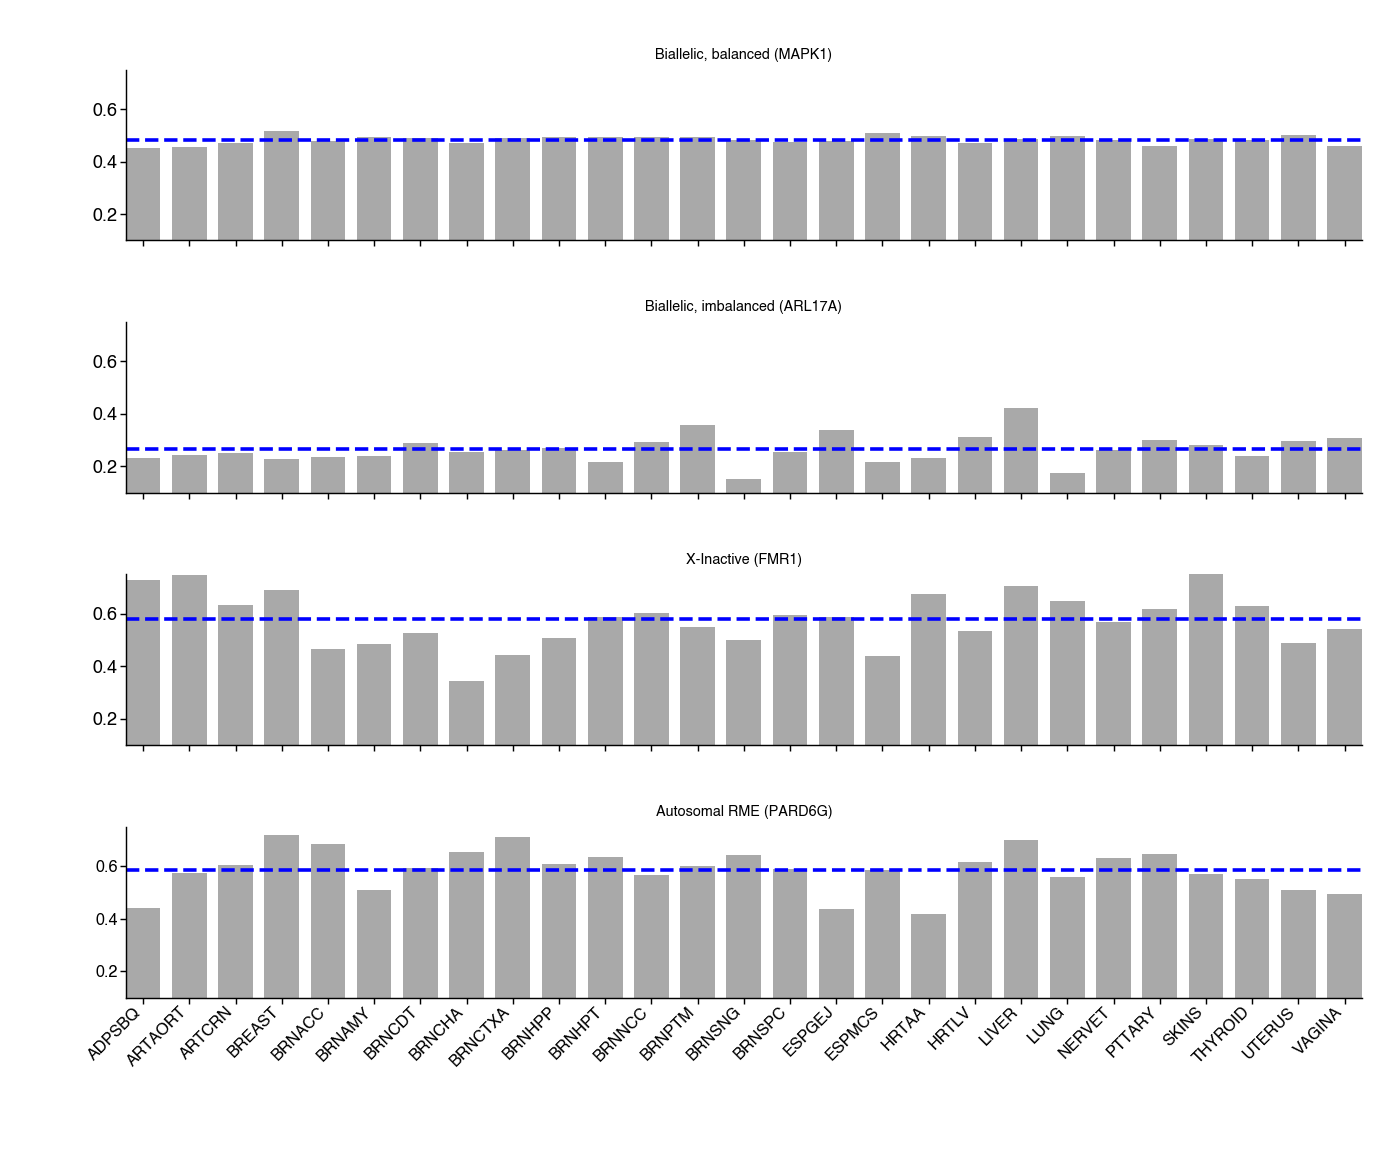

/var/folders/1t/rgnnsnln1v98rl8dvwy4q2kh0000gn/T/ipykernel_55575/1220124862.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(allele_ratios.columns, rotation=45, fontsize=9, ha='right', fontweight='light')


In [9]:
## Generate the Plot:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6, 5), sharex=True)
sns.despine()
axes = [ax1, ax2, ax3, ax4]

width = 0.75

# Plot bars:
ax1.bar(np.array(allele_ratios.columns), allele_ratios.loc[[('ENSG00000100030.14', 'MAPK1')]].fillna(0).values.flatten(), color= 'darkgrey', width=width) # "#46807D") 
ax2.bar(np.array(allele_ratios.columns), allele_ratios.loc[[('ENSG00000185829.17', 'ARL17A')]].fillna(0).values.flatten(), color='darkgrey', width=width) # "#2E423B") 
ax3.bar(np.array(allele_ratios.columns), allele_ratios.loc[[('ENSG00000102081.13', 'FMR1')]].fillna(0).values.flatten(), color='darkgrey', width=width) # "#E0B924") 
ax4.bar(np.array(allele_ratios.columns), allele_ratios.loc[[('ENSG00000178184.15', 'PARD6G')]].fillna(0).values.flatten(), color='darkgrey', width=width) # "#E35E39") 

# Title for each subplot:
ax1.set_title('Biallelic, balanced (MAPK1)', fontsize=8, fontweight='light')
ax2.set_title('Biallelic, imbalanced (ARL17A)', fontsize=8, fontweight='light')
ax3.set_title('X-Inactive (FMR1)', fontsize=8, fontweight='light')
ax4.set_title('Autosomal RME (PARD6G)', fontsize=8, fontweight='light')

# X-tick labels
ax4.set_xticklabels(allele_ratios.columns, rotation=45, fontsize=9, ha='right', fontweight='light')
ax4.tick_params(axis='x', which='major', pad=0)

# General formatting:
for i, ax in enumerate(axes):
    axes[i].set_ylim([0.1,0.75])
    axes[i].tick_params(axis='y', which='major', pad=1)
    axes[i].margins(0.05, 0)
    axes[i].margins(0)

# Add mean allele ratio ablines:
ax1.axhline(y=np.mean(allele_ratios.loc[[('ENSG00000100030.14', 'MAPK1')]].values), ls='--', lw=2, color='blue') #'#66CCCC')
ax2.axhline(y=np.mean(allele_ratios.loc[[('ENSG00000185829.17', 'ARL17A')]].values), ls='--', lw=2, color='blue') #"#46807D" #'#66CCCC')
ax3.axhline(y=np.mean(allele_ratios.loc[[('ENSG00000102081.13', 'FMR1')]].values), ls='--', lw=2, color='blue') #'#66CCCC')
ax4.axhline(y=np.mean(allele_ratios.loc[[('ENSG00000178184.15', 'PARD6G')]].values), ls='--', lw=2, color='blue') #'#66CCCC')

plt.yticks(fontsize=9, fontweight='light')
plt.tight_layout()

plt.show()


## Figure 1G-H: Binomial and Beta-Binomial fits to allelic expression for ARL17A and FMR1

In [10]:
from scipy.stats import binom
from scipy.stats import beta
from scipy.stats import betabinom


#### First we need to estimate the alpha and beta parameters for the Beta-Binomial Distribution:

In [11]:
def estBetaParams(mu, var):
    alpha = ((1 - mu) / var - 1 / mu) * mu ** 2
    beta = alpha * (1 / mu - 1)
    return(alpha, beta)

#### Get the alpha and beta parameters using the (1) allele ratios (2) allele counts, and (3) total counts for a given gene of interest: 

In [12]:
def get_BetaParams(gene_id, gene_name):
    # ratios:
    ratios = allele_ratios.loc[gene_id, gene_name].values.flatten()
    ratios = ratios[np.logical_not(np.isnan(ratios))]
    # 'allele 1' or ref counts
    refs = df_a1.loc[gene_id, gene_name].values.flatten()
    refs = refs[np.logical_not(np.isnan(refs))]
    # total counts:
    tots = df_tot.loc[gene_id, gene_name].values.flatten()
    tots = tots[np.logical_not(np.isnan(tots))]
    # Probability of Success (PER observation)
    p_all = refs/tots
    # Probability of Success (average across all observations)
    p_mean = sum(refs)/sum(tots) # Ex: 0.5056
    
    # Beta-Binomial:
    # Estimate alpha and beta for the mean and variance of the allele ratios:
    p_alpha = estBetaParams(np.mean(p_all), np.var(p_all))[0]
    p_beta = estBetaParams(np.mean(p_all), np.var(p_all))[1]
    return p_alpha, p_beta

#### Plot binomial vs. beta-binomial distribution for ARL17A:

In [13]:
arl17a_alpha, arl17a_beta = get_BetaParams('ENSG00000185829.17', 'ARL17A')

print(arl17a_alpha, arl17a_beta)

16.10484520198672 43.939913737940216


<IPython.core.display.Javascript object>


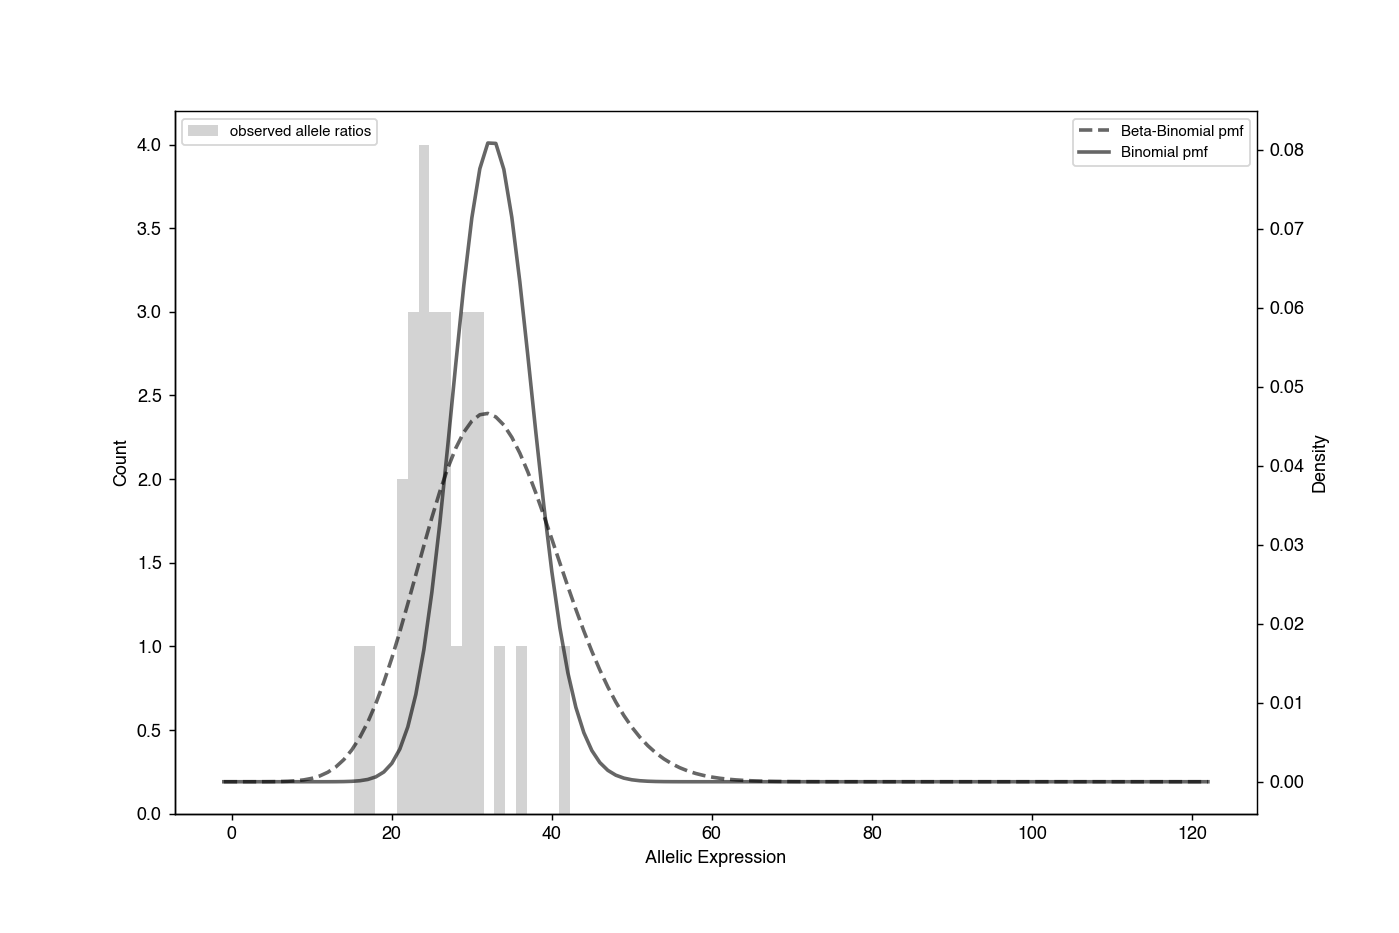

In [14]:
## Generate Probability Distribution Plots:

f, ax = plt.subplots()
sns.despine()

N = np.mean(df_tot.loc['ENSG00000185829.17', 'ARL17A'].values.flatten()).astype(int)
ratios = allele_ratios.loc['ENSG00000185829.17', 'ARL17A'].values.flatten()

## Plot allele-ratios:
ax.hist(ratios*100, bins=20, color='lightgrey', label='observed allele ratios') #density=True,

## Add twin plot for two y-axes:
ax2 = ax.twinx()

## Beta-Binomial:
x_bbinom = np.arange(betabinom.ppf(0.0, N, arl17a_alpha, arl17a_beta), betabinom.ppf(1, N, arl17a_alpha, arl17a_beta))
ax2.plot(x_bbinom, betabinom.pmf(x_bbinom, N, arl17a_alpha, arl17a_beta), '--', color='k', lw=2, alpha=0.6, label='Beta-Binomial pmf')

## Binomial:
x_binom = np.arange(binom.ppf(0, N, np.mean(ratios)), binom.ppf(1, N, np.mean(ratios)))
ax2.plot(x_binom, binom.pmf(x_binom, N, np.mean(ratios)), '-', color='k', lw=2, alpha=0.6, label='Binomial pmf')

## Formatting:
ax2.set_ylabel("Density", fontsize=10, fontweight='light')
ax.set_ylabel("Count", fontsize=10, fontweight='light')
ax.set_xlabel("Allelic Expression", fontsize=10, fontweight='light')
ax.legend(loc='upper left', fontsize='small')
ax2.legend(loc='upper right', fontsize='small')


#### Plot binomial vs. beta-binomial distribution for FMR1:

In [15]:
fmr1_alpha, fmr1_beta = get_BetaParams('ENSG00000102081.13', 'FMR1')

print(fmr1_alpha, fmr1_beta)

10.205544318578854 7.016002519971441


<IPython.core.display.Javascript object>


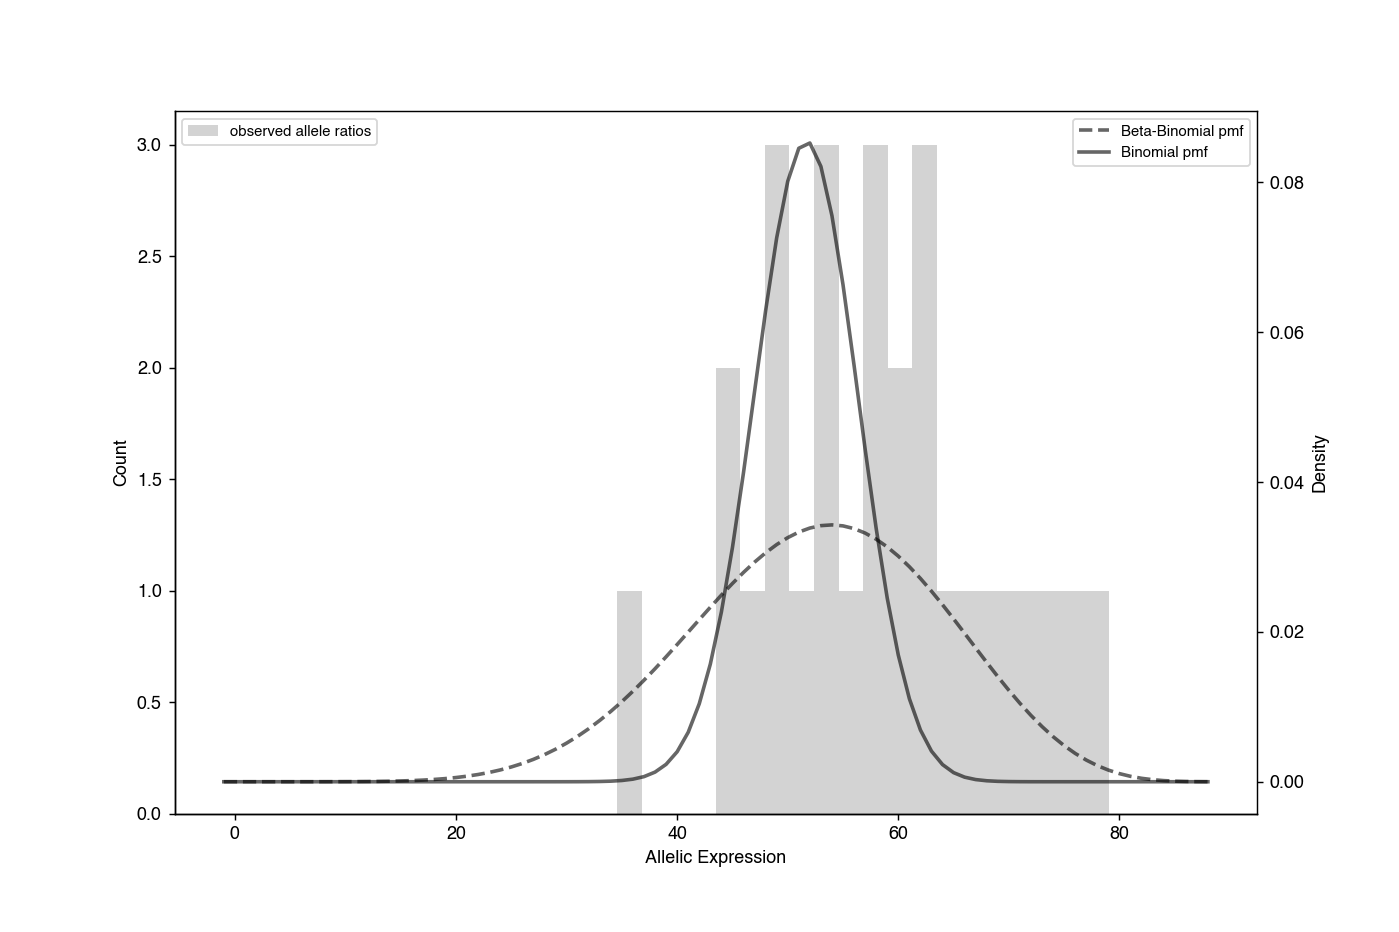

In [16]:
## Generate Probability Distribution Plots:

f, ax = plt.subplots()
sns.despine()

N = np.mean(df_tot.loc['ENSG00000102081.13', 'FMR1'].dropna().values.flatten()).astype(int)
ratios = allele_ratios.loc['ENSG00000102081.13', 'FMR1'].values.flatten()

## Plot allele-ratios:
ax.hist(ratios*100, bins=20, color='lightgrey', label='observed allele ratios') #density=True,

## Add twin plot for two y-axes:
ax2 = ax.twinx()
## Beta-Binomial:
x_bbinom = np.arange(betabinom.ppf(0.0, N, fmr1_alpha, fmr1_beta), betabinom.ppf(1, N, fmr1_alpha, fmr1_beta))
ax2.plot(x_bbinom, betabinom.pmf(x_bbinom, N, fmr1_alpha, fmr1_beta), '--', color='k', lw=2, alpha=0.6, label='Beta-Binomial pmf')

## Binomial
x_binom = np.arange(binom.ppf(0, N, np.mean(ratios)), binom.ppf(1, N, np.mean(ratios)))
ax2.plot(x_binom, binom.pmf(x_binom, N, np.mean(ratios)), '-', color='k', lw=2, alpha=0.6, label='Binomial pmf')

## Formatting:
ax2.set_ylabel("Density", fontsize=10, fontweight='light')
ax.set_ylabel("Count", fontsize=10, fontweight='light')
ax.set_xlabel("Allelic Expression", fontsize=10, fontweight='light')
ax.legend(loc='upper left', fontsize='small')
ax2.legend(loc='upper right', fontsize='small')


## Figure 1I: -log10(p-value) for autosomal and X-inactive genes for GTEX-YFC4

In [18]:
## Load data for all genes for GTEX-YFC4:
df_all = pd.read_csv('../data/GTEX-YFC4/GTEX-YFC4.v8.phASER.gw_phased.results.fdr_ALL.gene_info.zscores.mosaic.txt', sep='\t')

df_all.head()

,CHR,GENE_ID,GENE_NAME,SUBJECT_ID,tissue_num,data_pvalues,data_qvalues,data_lfdr,z_score,RME_effect,mosaic_category,is_significant
0,10,ENSG00000198825.12,INPP5F,GTEX-YFC4,34.0,0.0,0.0,0.000002,4.450350,frequent_RME,Autosome,True
1,11,ENSG00000167244.18,IGF2,GTEX-YFC4,31.0,0.0,0.0,0.000002,5.267541,frequent_RME,Autosome,True
2,11,ENSG00000244734.3,HBB,GTEX-YFC4,34.0,0.0,0.0,0.000002,4.353829,frequent_RME,Autosome,True
3,15,ENSG00000224078.13,SNHG14,GTEX-YFC4,34.0,0.0,0.0,0.000002,2.795049,frequent_RME,Autosome,True
4,15,ENSG00000137801.10,THBS1,GTEX-YFC4,34.0,0.0,0.0,0.000002,4.691592,frequent_RME,Autosome,True


<IPython.core.display.Javascript object>


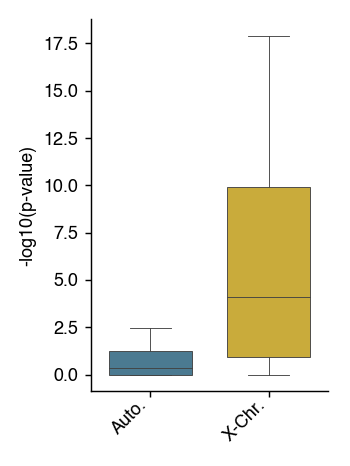

KruskalResult(statistic=116.34440471655408, pvalue=3.995259517721086e-27)


/var/folders/1t/rgnnsnln1v98rl8dvwy4q2kh0000gn/T/ipykernel_55575/637844288.py:5: RuntimeWarning: divide by zero encountered in log10
  auto_pvals = -np.log10(df_all.query('mosaic_category == "Autosome"')['data_pvalues'].to_list())
/var/folders/1t/rgnnsnln1v98rl8dvwy4q2kh0000gn/T/ipykernel_55575/637844288.py:6: RuntimeWarning: divide by zero encountered in log10
  x_pvals = -np.log10(df_all.query('mosaic_category == "X-Inactive"')['data_pvalues'].to_list())


In [19]:
## Figure 1I boxplots:
f, ax = plt.subplots(figsize=(1.5,2), tight_layout=True)
sns.despine()

auto_pvals = -np.log10(df_all.query('mosaic_category == "Autosome"')['data_pvalues'].to_list())
x_pvals = -np.log10(df_all.query('mosaic_category == "X-Inactive"')['data_pvalues'].to_list())

frames = [auto_pvals, x_pvals]

sns.boxplot(data=frames, linewidth=0.5, whis=1, width=0.7, palette=["#407e9c", "#E0B924"], showfliers=False) # old: "#46807D", "#E0B924" ## "#E35E39" (red color)
plt.ylabel("-log10(p-value)", fontsize=10, fontweight='light')
ax.set_xticklabels(['Auto.', 'X-Chr.'], rotation=45, fontsize=10, fontweight='light', ha='right')
ax.tick_params(axis='x', which='major', pad=-1)

## Statistical test:
kw_pval = stats.kruskal(auto_pvals, x_pvals)
print(kw_pval)


## Figure 1J: The proportion of significant (q<0.1) and non-significant autosomal and X-inactive genes for GTEX-YFC4:

In [20]:
# Autosomes:
sig_auto = df_all.query('is_significant == True and mosaic_category == "Autosome"')['GENE_ID'].to_list()
nonsig_auto = df_all.query('is_significant == False and mosaic_category == "Autosome"')['GENE_ID'].to_list()

# X-Inactive
sig_x_inact = df_all.query('is_significant == True and mosaic_category == "X-Inactive"')['GENE_ID'].to_list()
nonsig_x_inact = df_all.query('is_significant == False and mosaic_category == "X-Inactive"')['GENE_ID'].to_list()


significant_genes = [len(sig_auto)/(len(sig_auto) + len(nonsig_auto)),
                             len(sig_x_inact)/(len(sig_x_inact) + len(nonsig_x_inact))]
nonsignificant_genes = [len(nonsig_auto)/(len(sig_auto) + len(nonsig_auto)), 
                        len(nonsig_x_inact)/(len(sig_x_inact) + len(nonsig_x_inact))]

# Proportion of significant autosomes and XCI genes:
print(significant_genes)
# Proportion of non-significant autosomes and XCI genes:
print(nonsignificant_genes)

# Statistical test:
print(stats.fisher_exact([[len(sig_auto), len(sig_x_inact)], [len(nonsig_auto), len(nonsig_x_inact)]]))

[0.19287078294080204, 0.6697247706422018]
[0.8071292170591979, 0.3302752293577982]
(0.11784278985350677, 5.854022796933976e-27)


<IPython.core.display.Javascript object>


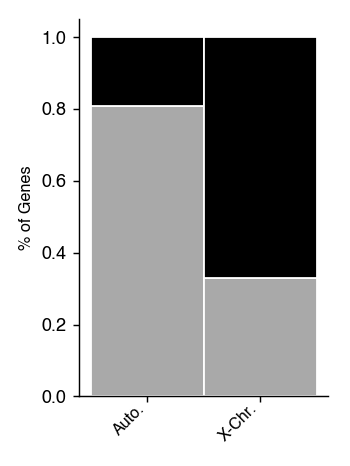

Text(0, 0.5, '% of Genes')

In [22]:
# Stacked Barplots:
f, ax = plt.subplots(figsize=(1.5,2), tight_layout=True)
sns.despine()

# The position of the bars on the x-axis
r = [0, 0.4]
 
# Names of group and bar width
names = ['Auto.','X-Chr.']
barWidth = 0.4

# Create 1st bar
plt.bar(r, nonsignificant_genes, color='darkgrey', edgecolor='white', width=barWidth, label="Non-Significant Genes") 
# Create 2nd bar, on top of the first ones
plt.bar(r, significant_genes, bottom=nonsignificant_genes, color='black', edgecolor='white', width=barWidth, label="Significant Genes")

# Custom X axis
plt.xticks(r, names, fontsize=9, rotation=45, ha='right', fontweight='light')
ax.tick_params(axis='x', which='major', pad=-1)
#ax.set_yticklabels([0, 50, 100], fontsize=9, fontweight='light')
plt.ylabel("% of Genes", fontsize=9, fontweight='light')

